# MBML Project v2.0

First loading in the necessary packages

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
random.seed(3)

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Sets up the Matplotlib options

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9,6)

Let's take a look at the data we are working on

In [4]:
df = pd.read_csv('leuksurv.csv')
df.head()

,time,cens,xcoord,ycoord,age,sex,wbc,tpi,district
0,1,1,0.205072,0.497244,61,0,13.3,-1.96,9
1,1,1,0.285557,0.848953,76,0,450.0,-3.39,7
2,1,1,0.176406,0.736494,74,0,154.0,-4.95,7
3,1,1,0.244763,0.210584,79,1,500.0,-1.40,24
4,1,1,0.327453,0.907387,83,1,160.0,-2.59,7


In [8]:
# data points
len(df)

1043

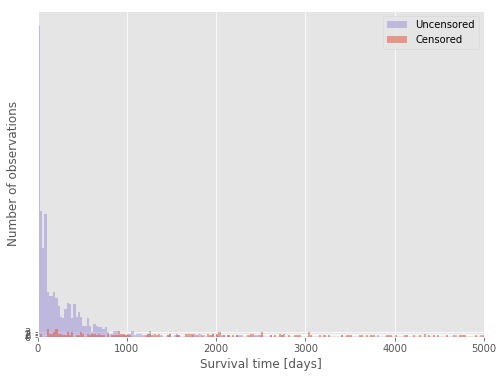

In [12]:
interval_length = 25
interval_bounds = np.arange(0, df.time.max() + interval_length + 1, interval_length)
n_intervals = interval_bounds.size - 1
intervals = np.arange(n_intervals)

fig, ax = plt.subplots(figsize=(8, 6))
blue, _, red = sns.color_palette()[:3]
ax.hist(df[df.cens == 1].time.values, bins=interval_bounds,
        color=red, alpha=0.5, lw=0,
        label='Uncensored');
ax.hist(df[df.cens == 0].time.values, bins=interval_bounds,
        color=blue, alpha=0.5, lw=0,
        label='Censored');
ax.set_xlim(0, interval_bounds[-1]);
ax.set_xlabel('Survival time [days]');
ax.set_yticks([0, 1, 2, 3]);
ax.set_ylabel('Number of observations');
ax.legend();